# Imports

In [1]:
import os
import time
import random
import numpy as np

import tensorflow as tf
import tensorflow.contrib.layers as layers

import gym
from gym import spaces
from PIL import Image
from collections import deque, namedtuple

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from environments import Snake
from methods import QNetwork, ReplayMemory
from agents import SnakeDQNAgent, SnakeDistDQNAgent

# NN training

In [3]:
aa = SnakeDQNAgent(model_name="dqn/boltzmann_8x8e999_5d_stupid", state_shape=[8, 8, 5])
#aa = SnakeDistDQNAgent(model_name="distdqn_boltzmann_8x8e999", state_shape=[8, 8, 5], num_atoms=51)

In [4]:
aa.set_parameters(max_episode_length=2000, replay_memory_size=100000, replay_start_size=10000,
                  discount_factor=0.999, final_eps=0.01, annealing_steps=500000)

In [ ]:
aa.train(gpu_id=1, exploration="boltzmann", save_freq=1000000, max_num_epochs=50)

frame count: 5655
average reward: -0.86
epsilon: 0.989
average lifetime: 11.31
-------------------------------
frame count: 14371
average reward: -0.778
epsilon: 0.972
average lifetime: 17.432
-------------------------------
frame count: 23533
average reward: -0.74
epsilon: 0.953
average lifetime: 18.324
-------------------------------
frame count: 33271
average reward: -0.684
epsilon: 0.934
average lifetime: 19.476
-------------------------------
frame count: 42652
average reward: -0.736
epsilon: 0.916
average lifetime: 18.762
-------------------------------
frame count: 53670
average reward: -0.616
epsilon: 0.894
average lifetime: 22.036
-------------------------------
frame count: 66576
average reward: -0.538
epsilon: 0.868
average lifetime: 25.812
-------------------------------
frame count: 81021
average reward: -0.388
epsilon: 0.84
average lifetime: 28.89
-------------------------------


# Visualization

In [5]:
from_epoch = 50

In [6]:
aa.eps = 1e-2

In [13]:
%%time
st, rew, grad, bellmans = aa.play_n_episodes_with_gradients(num_episodes=100, gpu_id=1, max_episode_length=2000, 
                             exploration='boltzmann', from_epoch=from_epoch)

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50
CPU times: user 6min 40s, sys: 52.9 s, total: 7min 33s
Wall time: 4min 4s


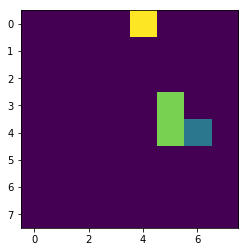

In [26]:
state = st[0][0]
img = sum([state[:,:,i]*(i+1) for i in [0, 1, 2, 3, 4]])
plt.imshow(img)

In [8]:
%%time
st, rew = aa.play_n_episodes(num_episodes=100, gpu_id=1, max_episode_length=2000, 
                             exploration='boltzmann', from_epoch=from_epoch)

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50
CPU times: user 1min 46s, sys: 14.5 s, total: 2min 1s
Wall time: 1min 13s


(array([ 1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  4., 91.]),
 array([ 0. ,  6.1, 12.2, 18.3, 24.4, 30.5, 36.6, 42.7, 48.8, 54.9, 61. ]),
 <a list of 10 Patch objects>)

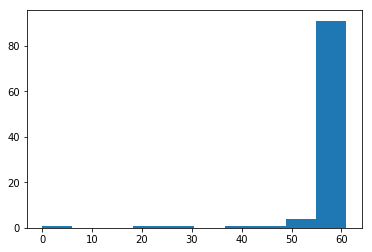

In [14]:
plt.hist(rew)

In [15]:
(np.array(rew)==61).sum()

78

In [16]:
np.mean(rew)

58.39

In [17]:
np.argsort(rew)

array([ 8, 95, 94, 47, 98, 39, 96, 84, 15, 22, 66, 17, 31, 32, 57, 53, 83,
       33, 99, 86, 13, 91, 63, 64, 65, 61, 67, 60, 68, 69, 70, 59, 58, 62,
       71, 76, 73, 97, 93, 92, 90, 89, 88, 87, 72, 85, 81, 80, 79, 78, 77,
       75, 74, 82, 56,  0, 54, 23, 21, 20, 19, 18, 16, 14, 12, 24, 11,  9,
        7,  6,  5,  4,  3,  2,  1, 10, 25, 26, 27, 52, 51, 50, 48, 46, 45,
       44, 43, 42, 41, 40, 38, 37, 36, 35, 34, 30, 29, 28, 55, 49])

In [18]:
np.array(rew)[np.argsort(rew)]

array([ 0, 24, 26, 40, 48, 49, 50, 50, 54, 56, 56, 56, 56, 56, 56, 56, 57,
       57, 58, 58, 59, 59, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
       61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
       61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
       61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
       61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61])

In [125]:
len(st[71])

787

In [42]:
grad[num][0][0][0].shape

(8, 8, 5)

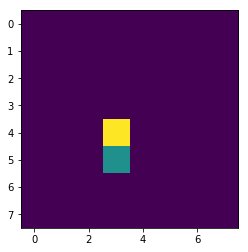

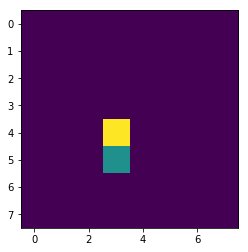

In [126]:
num = 71
start = 750
for time_step in range(start, len(st[num])):
    state = st[num][time_step]
    #state = grad[num][time_step][0][0]
    img = sum([state[:,:,i]*(i+1) for i in [0, 1, 3, 4]])
    if time_step % 1 == 0:
        plt.imshow(img)
        display.clear_output(wait=True)
        display.display(plt.gcf())

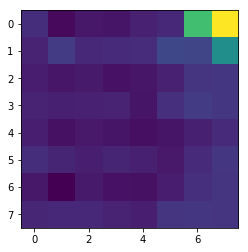

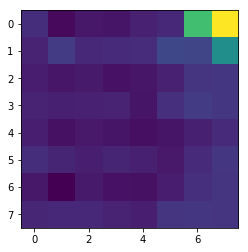

In [127]:
#num = 98
start = 0
norms = []
for time_step in range(start, len(st[num])-1):
    #state = st[num][time_step]
    state = grad[num][time_step][0][0]
    norm = np.linalg.norm(state)
    norms.append(norm)
    img = sum([state[:,:,i]*(i+1) for i in [0, 1, 3, 4]])
    if time_step % 100 == 0:
        plt.imshow(img)
        display.clear_output(wait=True)
        display.display(plt.gcf())

In [67]:
np.argsort(norms)[::-1][:10]

array([556, 616, 470, 390, 442, 196,  66, 278,  70, 573])

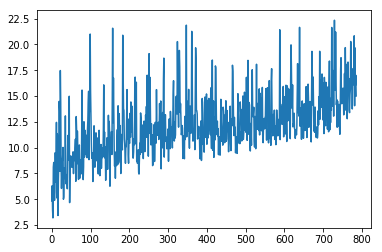

In [128]:
plt.plot(np.minimum(norms, 50), '-')

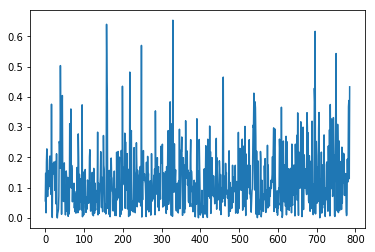

In [129]:
plt.plot(bellmans[num])

In [101]:
np.argmax(norms)

611

In [37]:
norms[-10:]

[18.25882,
 13.968602,
 18.935768,
 14.790593,
 15.920736,
 25.242369,
 21.964174,
 15.690662,
 16.759266,
 15.185252]

In [34]:
bellmans[num][-10:]

array([ 0.02974274,  0.14234932,  0.29319986,  0.17110213,  0.93041124,
        0.44007122,  0.66375246,  0.04679448,  0.06346042, 12.26950264])

In [126]:
np.abs(np.random.random(size=10))

array([0.69026288, 0.97610241, 0.21310688, 0.25247661, 0.28238127,
       0.59123431, 0.25253276, 0.51709609, 0.89591376, 0.50177449])

In [98]:
norms[-20:]

[65.848,
 19.09056,
 17.367935,
 22.156555,
 19.499144,
 15.366457,
 21.641083,
 17.833614,
 16.761194,
 19.090733,
 16.028679,
 16.419443,
 23.182627,
 20.833233,
 21.44269,
 14.481591,
 17.55101,
 13.448192,
 30.542316,
 13.73779]

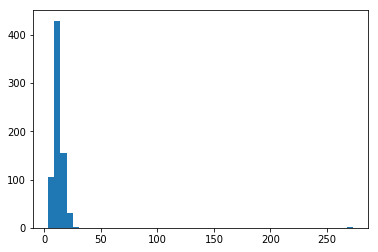

In [102]:
plt.hist(norms, bins=50);

In [52]:
43.11274-0.999*43.000065

0.15567506500000405

In [46]:
bellmans[num][:3]

array([0.15443899, 0.15567478, 0.04837341])

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50


array([[-0.46458435, 10.318831  , -1.671556  ]], dtype=float32)

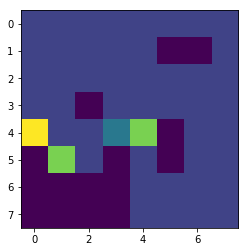

In [112]:
state = st[num][611]
#state = np.rot90(state)
#state = np.rot90(state)
#state = np.rot90(state)
#state = np.rot90(state)
img = sum([state[:,:,i]*(i+1) for i in range(5)])
plt.imshow(img)
aa.get_q_values([state], gpu_id=2, from_epoch=from_epoch)

In [61]:
np.linalg.norm(grad[num][890][0][0])

IndexError: list index out of range

In [29]:
norms

[24.609682,
 14.852001,
 13.856598,
 16.059,
 16.723822,
 14.858614,
 13.523892,
 12.57099,
 17.652782,
 12.958504,
 17.881718,
 13.63808,
 15.637628,
 16.999454,
 14.624116]

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50


array([[ 11.463609,  14.10663 , -34.39495 ]], dtype=float32)

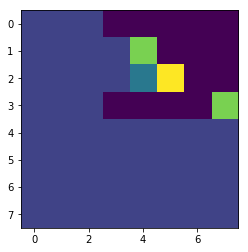

In [51]:
state = st[num][872]
#state = np.rot90(state)
#state = np.rot90(state)
#state = np.rot90(state)
#state = np.rot90(state)
img = sum([state[:,:,i]*(i+1) for i in range(5)])
plt.imshow(img)
aa.get_q_values([state], gpu_id=2, from_epoch=from_epoch)

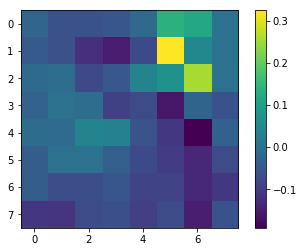

In [52]:
gr = grad[38][873][0][0]
plt.imshow(gr[:,:,4])
plt.colorbar()

In [83]:
(state[:,:,1]!=state[:,:,-1]).sum()

2

In [100]:
q_values = aa.get_q_values(st[num], gpu_id=2, from_epoch=from_epoch)

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50


In [103]:
q_spread = np.max(q_values, axis=1) - np.min(q_values, axis=1)

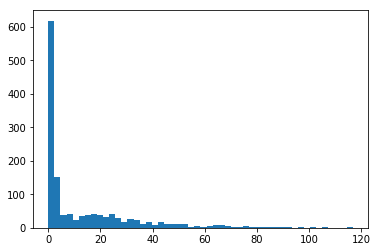

In [126]:
plt.hist(q_spread, bins=50);

In [110]:
np.argsort(q_spread)[::-1][:10]

array([ 544, 1045,  543, 1157, 1128,  762, 1275,  990,  729, 1335])

In [59]:
actions = np.random.randint(3, size=35)

In [75]:
config = aa.gpu_config(2)

with tf.Session(config=config) as sess:
    aa.saver.restore(sess, aa.path+"/model-"+str(from_epoch))
    #features = aa.agent_net.get_features(sess, st[0])
    #gradients = aa.agent_net.get_gradients(sess, st[72], actions)
    gr2 = aa.agent_net.get_gradients(sess, st[72][0].reshape(1, 8, 8, 5), actions[0].reshape(1, ))

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50


In [73]:
gr2[0][0].shape

(8, 8, 5)

In [72]:
gr1[0].shape

(8, 8, 5)

In [74]:
gr1[0]=gr2[0][0]

In [50]:
gr2[0][0].shape

(8, 8, 5)

In [51]:
gr1[0]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.99020386e+01, -1.18397743e+02,  1.39849243e+01,
         1.27430856e-01, -1.94481659e+01],
       [ 4.33639717e+01, -2.89101440e+02, -1.54107485e+01,
         5.09078836e+00, -2.25040493e+01],
       [-3.68004150e+01, -1.36711166e+02,  4.04458694e+01,
         3.96173835e+00,  8.86772537e+00]], dtype=float32)

In [54]:
gr2[0][0][0]==gr1[0]

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [55]:
np.linalg.norm(gr1-gr2[0][0])

5.4976892e-05

In [28]:
gr1 = gradients[0][0]

In [39]:
gr1[:,:,0]

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  6.9902039e+01,  4.3363972e+01, -3.6800415e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  2.4298088e+01,  3.9720543e+01,  1.2715421e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, -9.9838778e-02, -2.3712592e+00,  2.9424384e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0

In [44]:
gr2[0][0][:,:,0]

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  6.9902039e+01,  4.3363972e+01, -3.6800419e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  2.4298090e+01,  3.9720505e+01,  1.2715423e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, -9.9839516e-02, -2.3712597e+00,  2.9424376e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0

In [20]:
actions = np.random.randint(3, size=35)

In [21]:
actions

array([0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 0])

In [19]:
len(st[72])

35

In [53]:
norms = []
for i in range(features.shape[0]-1):
    norm = np.linalg.norm(features[i]-features[i+1])
    norms.append(norm)

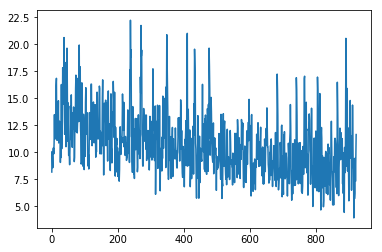

In [55]:
plt.plot(norms)

In [75]:
idx = np.argsort(norms)[::-1]
idx

array([238, 270, 410, 348,  37, 890,  83, 476,  46, 409, 432, 240, 272,
        82, 271, 239, 891, 349,  41, 477,  86, 433,  33, 306, 236, 682,
        73, 765, 268, 804, 740,  80, 764,  14, 434, 154, 350,  38, 186,
       864, 237,  91, 119, 120, 456,  29,  13, 144,  47, 346, 103, 894,
       145, 741,  72, 683,  85, 478, 171, 805, 137, 190, 269,  79, 811,
       179, 214,  59, 187, 336, 482, 153, 343, 597,  36, 390, 163, 903,
        20, 143,  34, 126, 770, 218, 102, 165,  49, 865, 159, 188, 430,
        35, 474, 722, 131, 910,  18, 320, 326, 313,  56, 245,  66, 215,
       651, 347, 786, 125, 278,  42, 471, 413, 162, 391, 344, 230, 351,
        57,  44, 483, 183, 114,  63, 107, 123, 519, 779,  40,  96, 512,
        17, 605,   8, 262, 286, 465,  67, 283,  70, 116, 160, 604, 742,
       442, 279, 684, 156, 297, 356, 136, 806, 170, 383, 386, 253, 312,
       257, 463,  75, 574, 562, 472, 513, 324, 117, 780,  97, 406,  84,
       889, 304, 523,  23, 846,  32, 316, 161,  81,  65, 595, 18

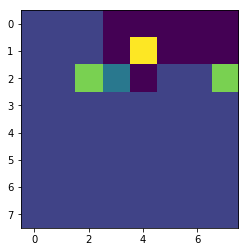

In [95]:
state = st[0][890]
img = sum([state[:,:,i]*(i+1) for i in [0, 1, 2, 3, 4]])
plt.imshow(img)

In [89]:
st[0][410][:,:,4]

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [90]:
st[0][410][:,:,1]

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [80]:
norms[410]

21.012585

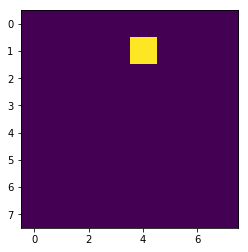

In [134]:
plt.imshow(state[:,:,4])

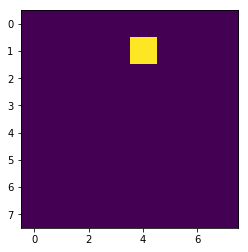

In [135]:
plt.imshow(state[:,:,1])

In [96]:
#state = st[20][0]
#state = np.rot90(state)
aa.get_q_values([state], gpu_id=2, from_epoch=6)

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d/model-6


array([[42.903915, 43.1573  , 43.29431 ]], dtype=float32)

In [89]:
qs[-2]

array([11.058722 ,  0.8006149, 26.021236 ], dtype=float32)

In [78]:
qs = aa.get_q_values(st[4], gpu_id=2, from_epoch=44)

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999/model-44


In [40]:
lengths

[184,
 275,
 233,
 314,
 220,
 255,
 354,
 304,
 402,
 433,
 347,
 405,
 457,
 420,
 472,
 548,
 541,
 556,
 566,
 713,
 672,
 590,
 593,
 678,
 685,
 693,
 712,
 882,
 809,
 784,
 682,
 612,
 762,
 738,
 708,
 865,
 894,
 763,
 884,
 953,
 765,
 802,
 860,
 703,
 1011,
 874,
 861,
 824,
 711,
 1083,
 805,
 857,
 705,
 721,
 816,
 730,
 778,
 753,
 838,
 1034,
 825,
 798,
 786,
 829,
 798,
 807,
 783,
 1045,
 741,
 967,
 828,
 811,
 800,
 875,
 880,
 935,
 879,
 723,
 872,
 808,
 916,
 966,
 1132,
 756,
 977,
 882,
 885,
 884,
 875,
 745,
 824,
 829,
 945,
 816,
 976,
 800,
 780,
 778,
 666,
 861]

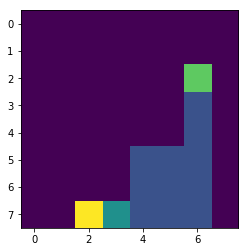

10

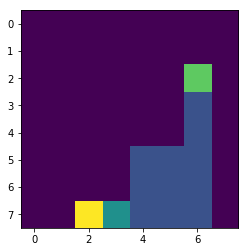

In [6]:
aa.play(gpu_id=1, max_episode_length=100, from_epoch=44)